<h1 align="center"> Data Analysis Project</h1>

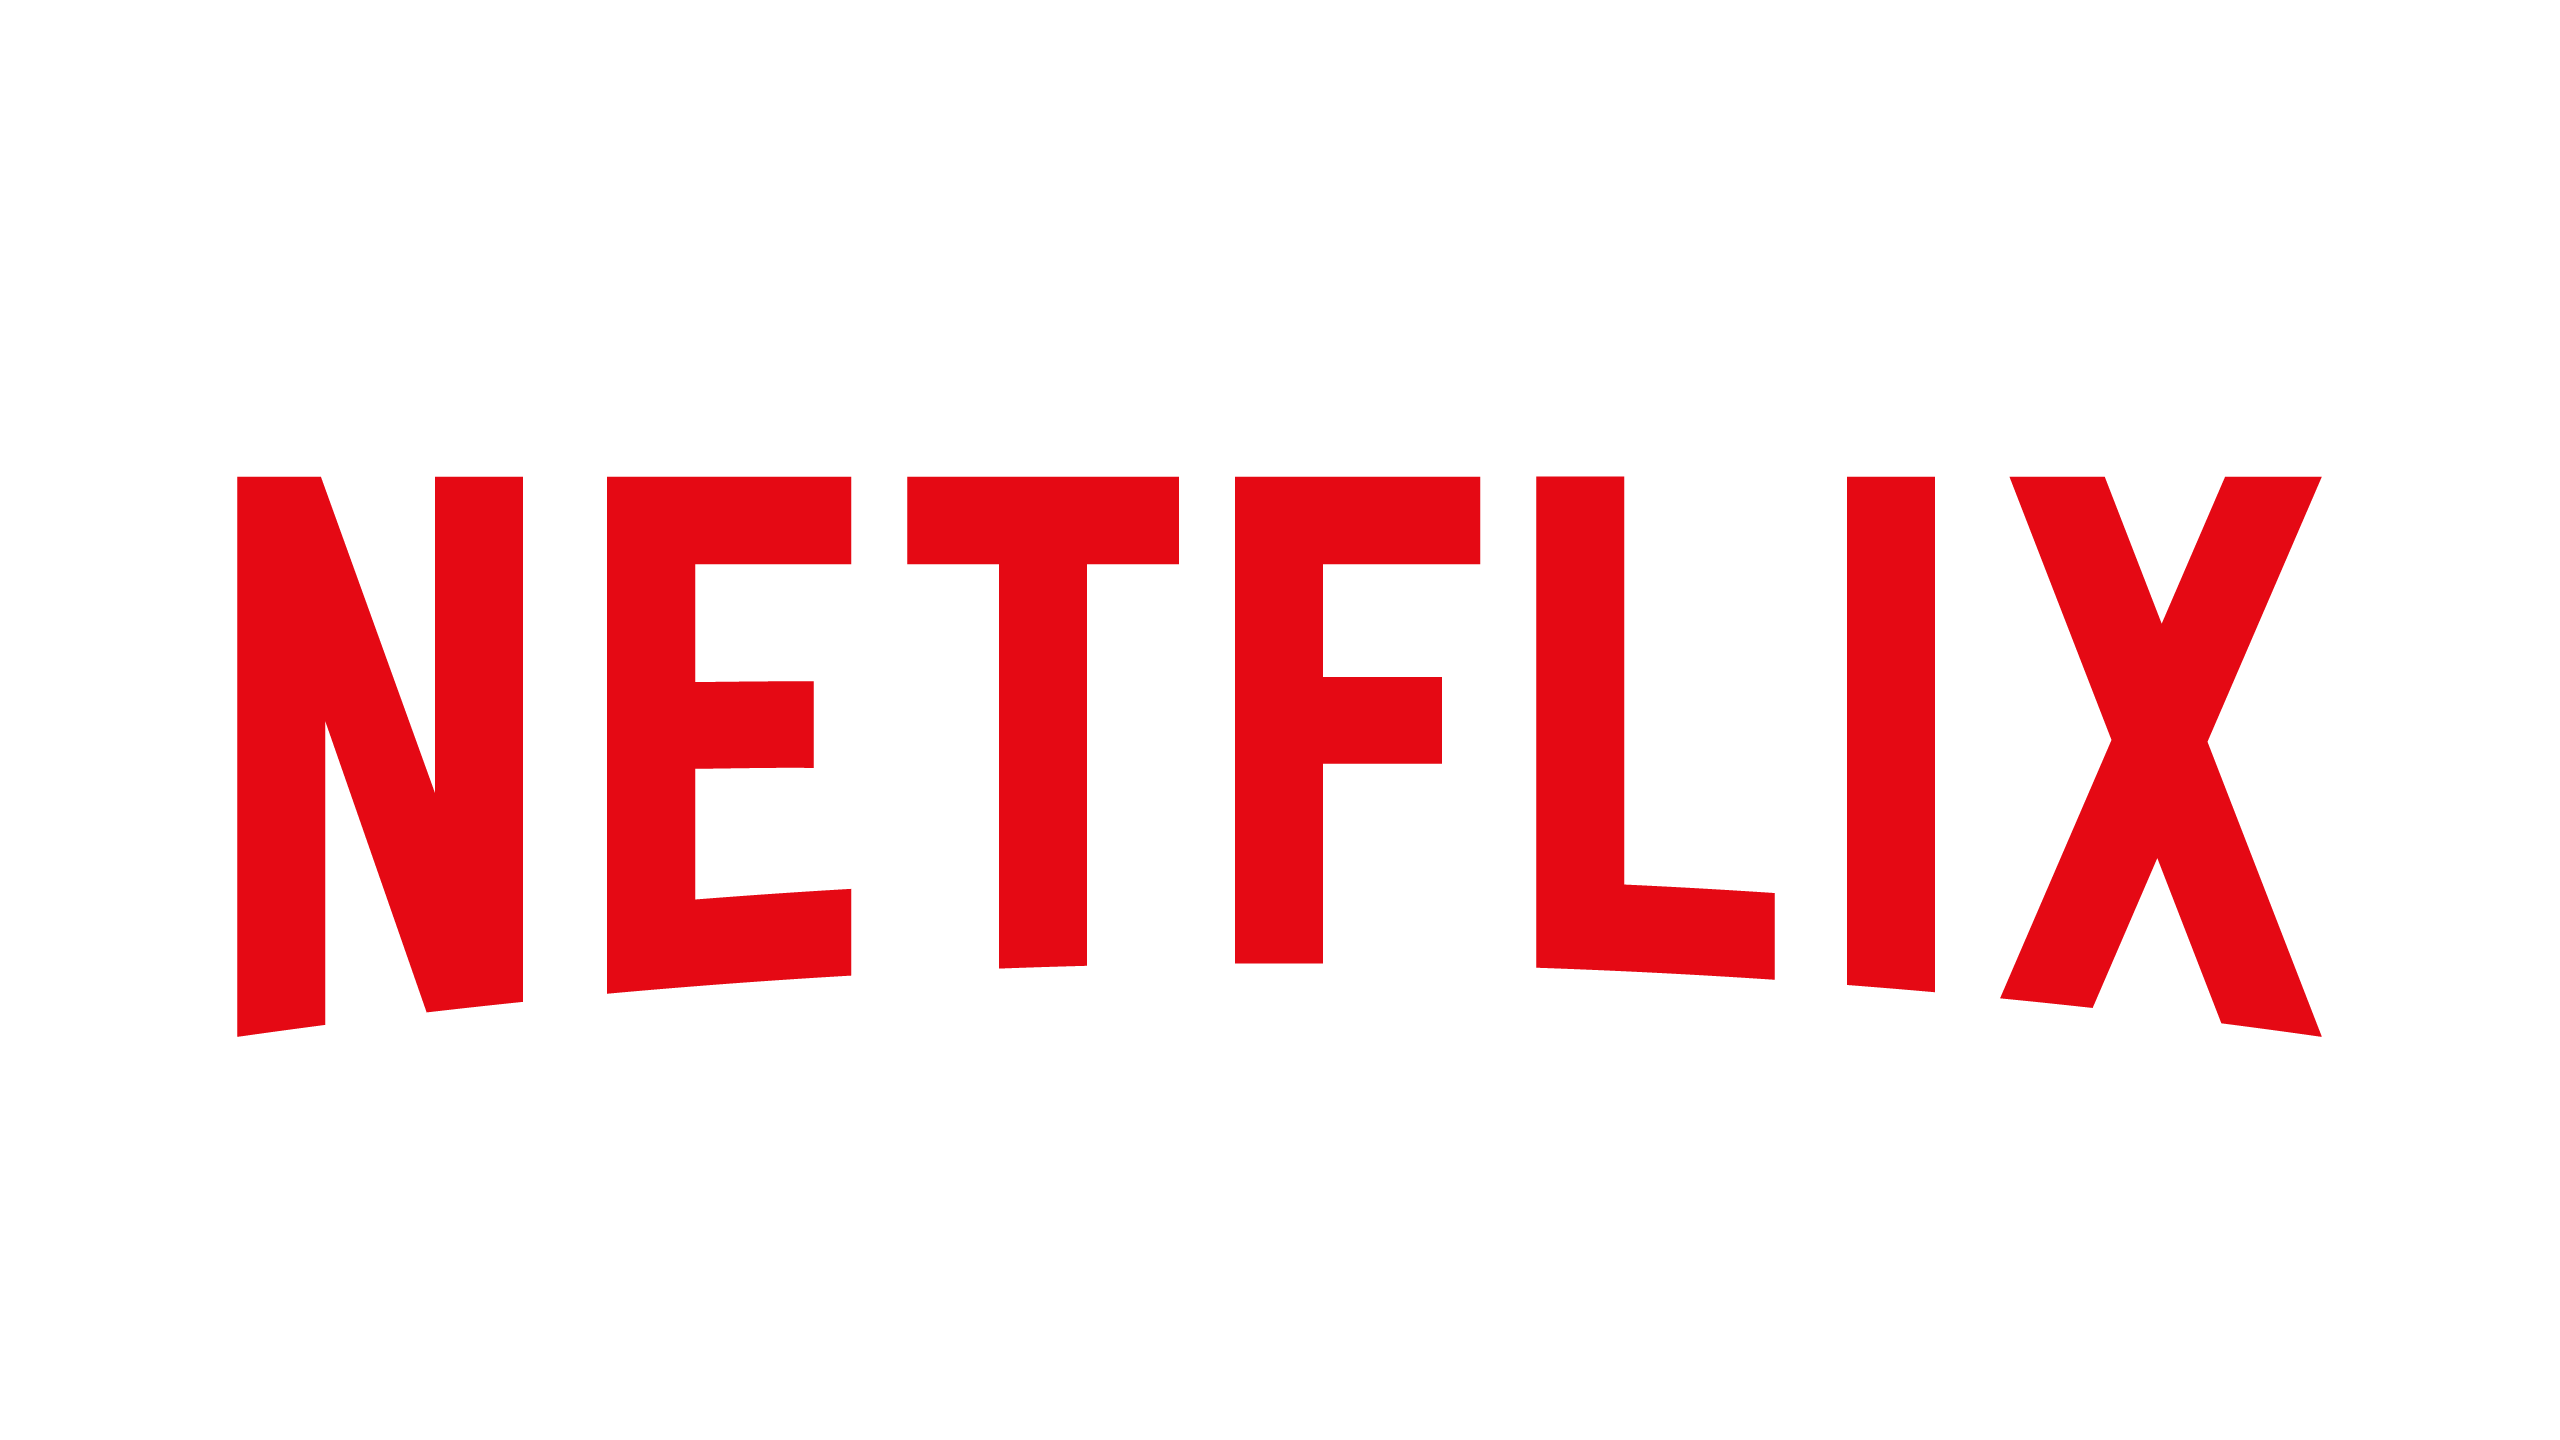

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors  # Import matplotlib colors module
sns.set(palette='deep')

%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8) 

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

# read the data 

df = pd.read_csv('data/Netflix.csv')


***

# Introduction
    
<details>
    <summary>Click for Details</summary>
  
Netflix leads the streaming industry with an extensive library of nearly 9000 titles. As of 2021, the platform has over 247 million subscribers worldwide. Utilising a subscription-based model, Netflix tailors its content recommendations to individual preferences, providing a personalised, user-friendly and affordable viewing experience.

This particular dataset explores the different attributes of shows and movies streamed on the platform.
    
**_Description of Columns_**
    
1. show_id - Unique identifier for each movie/tv show.
2. type - Type of content such as movie or TV show.
3. title - Title of movie or tv show.
4. director - Director of movie or tv show.
5. country - The country where the movie or TV show was produced.
6. date_added - The date when the content was added to Netflix streaming platform.
7. release_year - The year the movie or TV show was originally released.
8. rating - The content's rating - indicates the recommended audience age or maturity level (e.g, PG-13).
9. Duration - The duration of the movie or TV show (minutes/seasons)
10. listed_in - Classification of content into categories 
    
Netflix has led the standards in consumer entertainment by continuously retraining their algorithims to produce contemporary recommendations. It's success highlights the significance of streaming services in today's current media landscape and gives consumers, creators and analysts better insights into what success in streaming looks like.  
    
</details>


***

# Problem Statement 

<details>
  <summary>Click for Details</summary>
<div class="alert alert-block alert-info">
<b> <h1 align="center">Enhancing User Engagement through Content Optimisation: A Comprehensive Analysis of Netflix's Content Popularity to Drive Subscription Growth & Retention. </h1>
</div>

Analysis of **content popularity and acquisition** will provide an insight into Netflix's strategies for optimising content. This will feature the following:
    
1. Ratio of movies to shows.
2. Analysis of countries contributing to Netflix content.
3. Genre trends.
4. Rating trends.
5. Annual and monthly trends in content additions relative to release years.
6. Analysis of content duration to gauge user engagement levels.
    
</details>


***

# Exploratory Data Analysis (EDA), Data Cleaning & Transformation. 
    

<details>
  <summary>Click for Details</summary>

<b> <h3 >EDA Process </h3>

    
1. Explore dataset & variable relationships. 
    
2. Deal with missing data.
    
3. Set New Index.

4. Convert column datatypes.

5. Standardise datetime format.

6. Remove Duplicates
    
</details>


In [2]:
import os
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'clean.gif',
 'Data',
 'NetflixDataAnlaysisProject.ipynb']

![clean_gif](clean.gif)

**_Dataset Information & Variables_**

In [3]:
# Show row/columns and data info.

df.tail(3)
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [4]:
# Variables in df

variables = pd.DataFrame(columns = ['variable', 'no. of unique values', 'values'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].unique().tolist()]
    
variables

variable  no. of unique values  \
0       show_id                  8790   
1          type                     2   
2         title                  8787   
3      director                  4528   
4       country                    86   
5    date_added                  1713   
6  release_year                    74   
7        rating                    14   
8      duration                   220   
9     listed_in                   513   

                                              values  
0  [s1, s3, s6, s14, s8, s9, s10, s939, s13, s940...  
1                                   [Movie, TV Show]  
2  [Dick Johnson Is Dead, Ganglands, Midnight Mas...  
3  [Kirsten Johnson, Julien Leclercq, Mike Flanag...  
4  [United States, France, Brazil, United Kingdom...  
5  [9/25/2021, 9/24/2021, 9/22/2021, 05/01/2021, ...  
6  [2020, 2021, 1993, 2019, 2013, 2014, 2018, 199...  
7  [PG-13, TV-MA, TV-PG, TV-14, TV-Y7, TV-Y, PG, ...  
8  [90 min, 1 Season, 91 min, 125 min, 9 Seasons,...  
9  [Documentaries, Crime TV Shows, International ...

**_Missing data_**

In [5]:
# Check for 'Not Given' values

for col in df.columns:
    unknown_values = df[df[col] == 'Not Given'].nunique()[0]
    
    print('{} - {}'.format(col, unknown_values))
    

# Calculate percentage of missing directors and countries 

directors_not_given  = round(len(df[df['director'] == 'Not Given']) / len(df) *100, 2)
countries_not_given  = round(len(df[df['country'] == 'Not Given']) / len(df) *100, 2)

# Replace 'Not Given' with 'Unknown'.

df.replace(to_replace='Not Given', value= 'Unknown', inplace=True)

show_id - 0
type - 0
title - 0
director - 2588
country - 287
date_added - 0
release_year - 0
rating - 0
duration - 0
listed_in - 0


**_Clean Dataframe_**

In [6]:
# check show_id, remove the 's' and set as new index

df['show_id'].str[0].value_counts()

def remove_s(x):
    return int(x[1:])

df['show_id'] = df['show_id'].apply(remove_s)

df.set_index(['show_id'], inplace=True)

# Change columns to category type 

categorical_columns = ['type', 'country', 'rating']
df[categorical_columns] = df[categorical_columns].astype('category')

# standardise date/time 

df['date_added'] = pd.to_datetime(df['date_added'])
df['date_added'].head(2)

# find duplicate titles

newlist = []
dupelist = []

for i in df['title']:
    if i not in newlist:
        newlist.append(i)
        
    else:
        dupelist.append(i)
        
print("List of duplicates", dupelist)

# remove duplicate rows

df.drop_duplicates(inplace=True)

df.info()

List of duplicates ['09-Feb', '22-Jul', '15-Aug']
<class 'pandas.core.frame.DataFrame'>
Index: 8787 entries, 1 to 8786
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8787 non-null   category      
 1   title         8787 non-null   object        
 2   director      8787 non-null   object        
 3   country       8787 non-null   category      
 4   date_added    8787 non-null   datetime64[ns]
 5   release_year  8787 non-null   int64         
 6   rating        8787 non-null   category      
 7   duration      8787 non-null   object        
 8   listed_in     8787 non-null   object        
dtypes: category(3), datetime64[ns](1), int64(1), object(4)
memory usage: 509.8+ KB


***

<div class="alert alert-block alert-info">
<b> <h3 >EDA Summary</h3>
</div> 
<details>
  <summary>Click for Details</summary>
 

- Missing data in the form of 'Not Given', are in two columns:
    - 'director' column - 29.44% missing data -  values have been retained to avoid loss of significant portion of data.
    - 'country' column - 3.27% missing data - values have been retained as the proportion of missing data is minimal.
    
- 'show_id' column - 's' has been removed and column has been set as index.

- 'type', 'country' & 'rating' columns have been changed to category data type, reducing overall memory usage by 178 KB. 
    
- 'date_added' column - has been standardised in datetime data type.
    
- Only 3 titles were duplicates and these have been removed. 
    
**The clean dataframe has 9 columns and 8786 rows.**
    
    
</div>
    
</details>

***

# Ratio of movies in the Top 10 Countries for Content Production

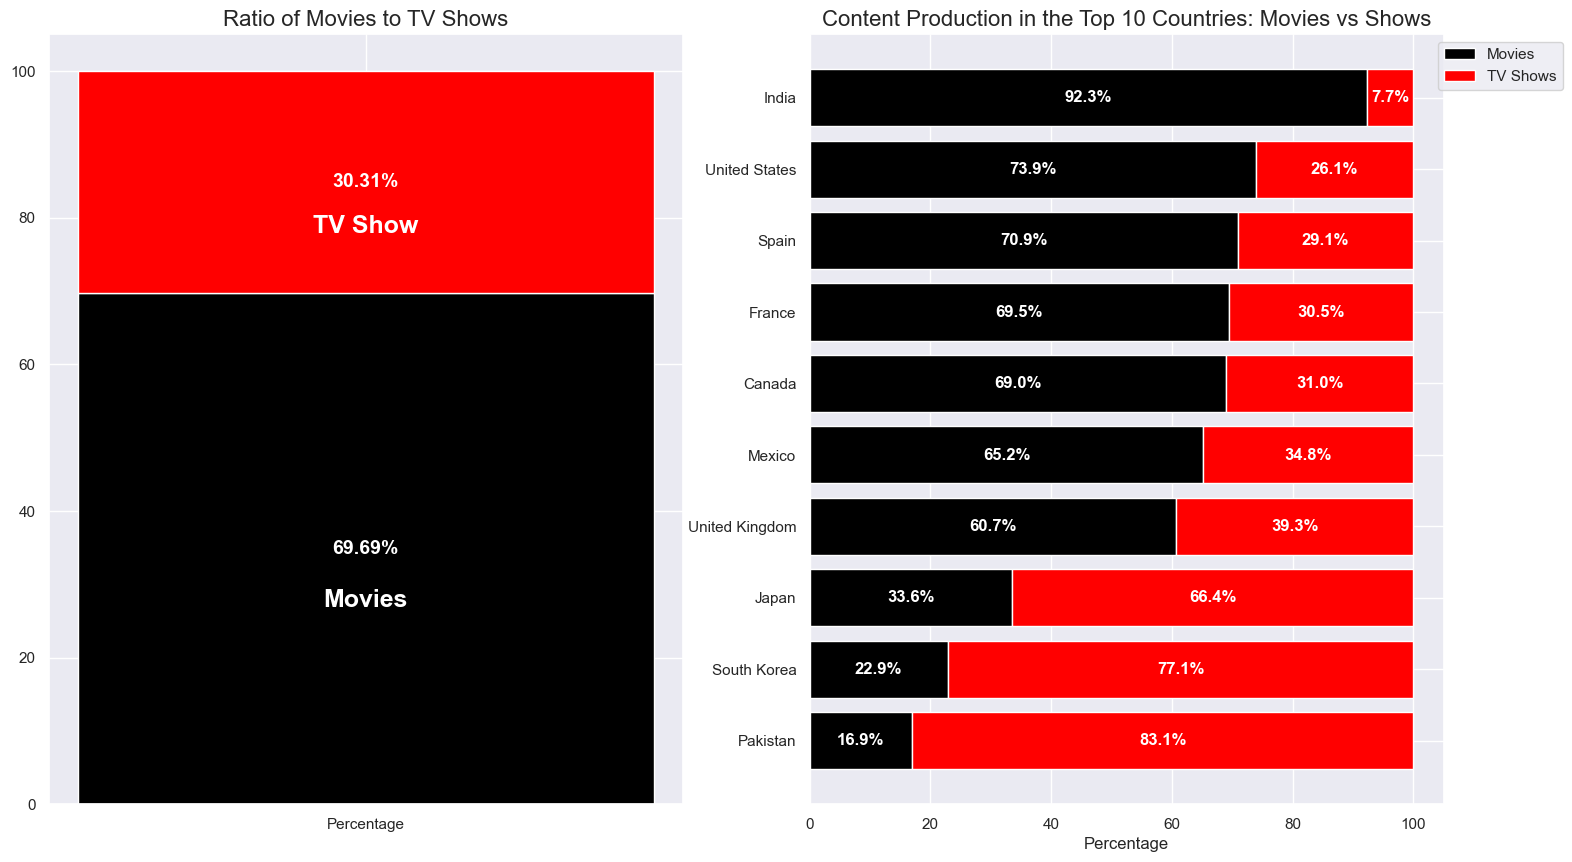

In [7]:
topcountries = df['country'].value_counts().head(11).drop('Unknown')
tc = topcountries.index.to_list()

# Graph 1: Ratio of movies to TV shows
percentage_movies = round(len(df[df['type'] == 'Movie']) / len(df) * 100, 2)
percentage_tv = round(len(df[df['type'] == 'TV Show']) / len(df) * 100, 2)

fig, axs = plt.subplots(1, 2, figsize=(18, 10))

# Plot Graph 1
axs[0].bar('Percentage', percentage_movies, color='black', label=f'Movie ({percentage_movies}%)')
axs[0].bar('Percentage', percentage_tv, bottom=percentage_movies, color='red', label=f'TV Show ({percentage_tv}%)')

# percentage labels 
axs[0].text('Percentage', percentage_movies / 2, f'{percentage_movies}%', color='white', ha='center',
            va='center', fontsize=14, fontweight='bold')
axs[0].text('Percentage', percentage_movies + (percentage_tv / 2), f'{percentage_tv}%', color='white', ha='center',
            va='center', fontsize=14, fontweight='bold')

# 'Movie' & 'TV Show' labels 
axs[0].text('Percentage', percentage_movies * 0.4, 'Movies', color='white', ha='center', va='center', fontsize=18,
            fontweight='bold')
axs[0].text('Percentage', percentage_movies + percentage_tv * 0.3, 'TV Show', color='white', ha='center', va='center',
            fontsize=18, fontweight='bold')

axs[0].set_title('Ratio of Movies to TV Shows', size=16)

# Graph 2: Percentage of TV shows and movies for each country

def tv_movie_percentage(df, country_names, ax):
   
    # movie percentages 
    movies_percentages = []
    for country in country_names:
        country_data = df[df['country'] == country]['type'].value_counts()
        total = country_data.sum()
        movies = country_data.get('Movie')
        movies_percentage = movies / total * 100
        movies_percentages.append((country, movies_percentage))
    
    # Sort countries based on movies percentages
    sorted_countries = [x[0] for x in sorted(movies_percentages, key=lambda x: x[1], reverse=False)]

    # variables left stacking
    left_movies = [0] * len(country_names)

    for idx, country in enumerate(sorted_countries):
        country_data = df[df['country'] == country]['type'].value_counts()
        total = country_data.sum()
        movies = country_data.get('Movie')
        tv_shows = total - movies

        # percentages
        movies_percentage = movies / total * 100
        tv_shows_percentage = tv_shows / total * 100

        # Plot movies
        ax.barh(idx, movies_percentage, left=left_movies[idx], color='black')
        left_movies[idx] += movies_percentage

        # Plot TV shows
        ax.barh(idx, tv_shows_percentage, left=left_movies[idx], color='red')
        left_movies[idx] += tv_shows_percentage

        # percentage labels
        ax.text(movies_percentage / 2, idx, f'{movies_percentage:.1f}%', va='center',
                ha='center', color='white', fontsize=12, fontweight='bold')
        ax.text(movies_percentage + tv_shows_percentage / 2, idx, f'{tv_shows_percentage:.1f}%', va='center',
                ha='center', color='white', fontsize=12, fontweight='bold')

    # legend
    legend = ax.legend(['Movies', 'TV Shows'], loc='upper right', bbox_to_anchor=(1.2, 1))

    ax.set_yticks(range(len(sorted_countries)))
    ax.set_yticklabels(sorted_countries)
    ax.set_xlabel('Percentage')
    ax.set_title('Content Production in the Top 10 Countries: Movies vs Shows', size=16)

    # Plot graph 2
tv_movie_percentage(df, tc, ax=axs[1])

plt.show()


<div class="alert alert-block alert-info">
<b> <h3 >Ratio of movies to shows: Data-driven Insights</h3>
</div> 
<details>
  <summary>Click for Details</summary>
    
- Netflix streams a higher ratio of movies (6124 titles) than TV Shows (2663 titles). 

- Netflix is at an advantage through its addition of titles produced from diverse geographical locations (86 countries). The data features:

    - Hollywood (3240 titles) & Bollywood (1057 titles) film industries dominate.
    - A primary focus on movie content produced from Western countries.
    - Nearly balanced investment in Movies (60%) and TV series (40%) in the UK.
    - Predominant focus on TV series produced in the Eastern region: Pakistan, South Korea, and Japan.     

__Netflix's expansion into International markets and its investment in region-specific content has facilitated the platform to meet the needs of a global audience. This approach has not only increased the number of subscribers but also secured Netflix's reputation in the streaming entertainment industry.__
    
</details>


# Genre Trends

In [8]:
# There is an exhaustive list (513) of genres

df['listed_in'].nunique()

# Repetition of genres with lengthy strings, containing genres as well as subgenres.

df['listed_in'].value_counts().head(10)

# split each string at every comma. 
# transform each element to a new row.

df['listed_in'].str.split(',').explode().count()

# List of unique genres has now significantly reduced to 73

df['listed_in'].str.split(',').explode().nunique()

# list the top ten genres

top_10_genre = df['listed_in'].str.split(',').explode().value_counts().head(10)

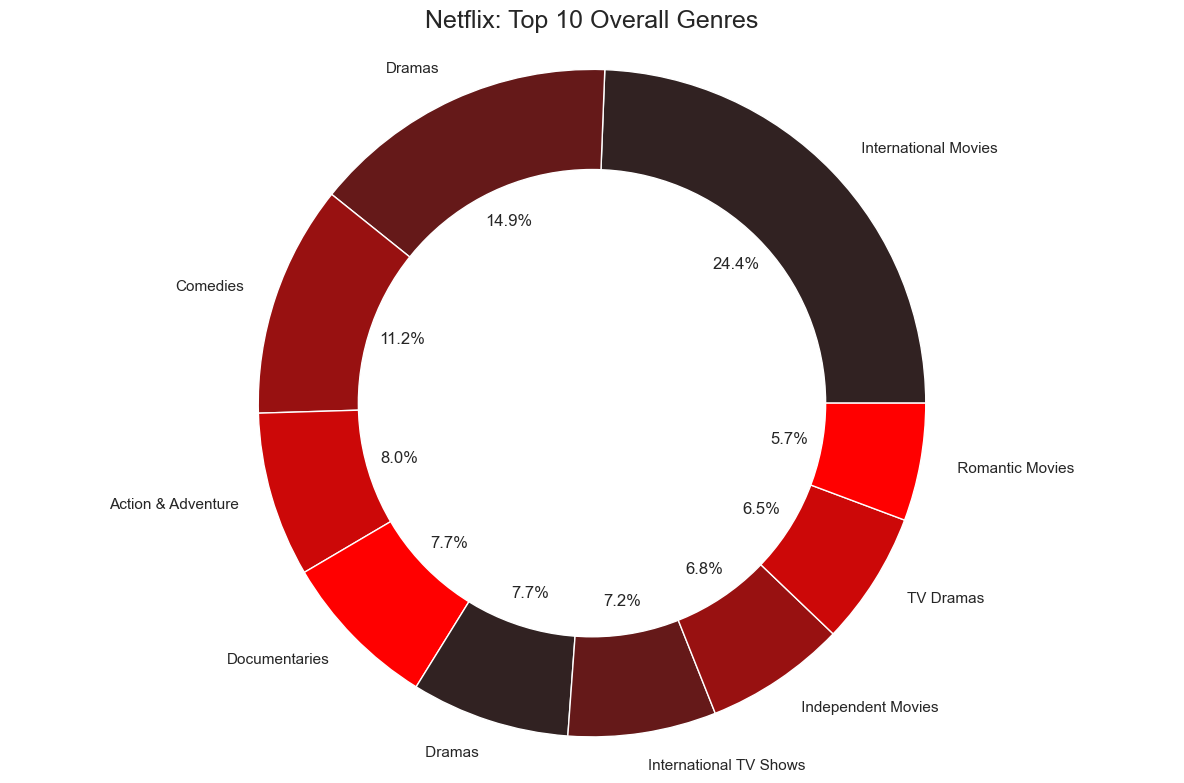

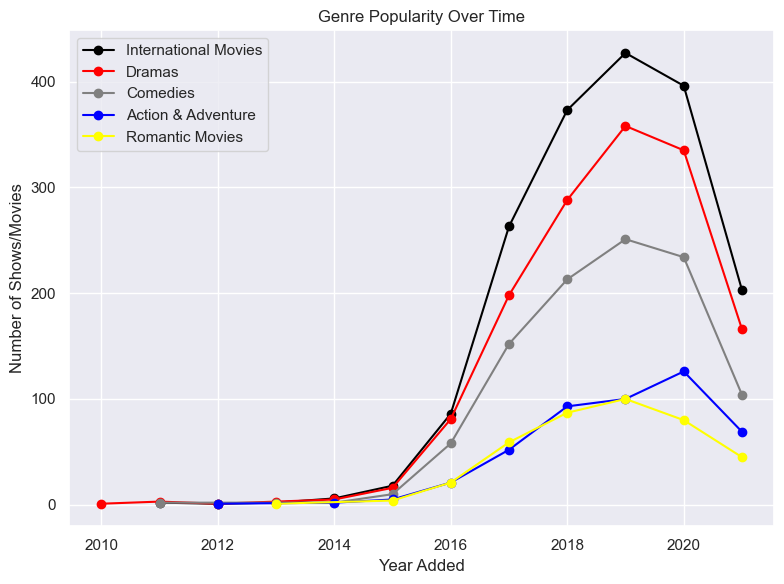

In [9]:
# Pie chart top 10 Genres

custom_palette = sns.color_palette("dark:red", 5)
plt.figure(figsize=(12, 8))

# data 
sizes = top_10_genre.values
labels = top_10_genre.index

# values
plt.pie(sizes, labels=labels, colors=custom_palette, autopct='%1.1f%%', wedgeprops=dict(width=0.4))

# Add circle in middle 
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Netflix: Top 10 Overall Genres', size=18)
plt.axis('equal')  # pie drawn as a circle.
plt.tight_layout()
plt.show()

# Plot Genre over time

def analyse_genre(netflix_data):
    genre = df.copy()  

    # standardise release year, add 'year added' column
    genre['release_year'] = pd.to_datetime(genre['release_year'], format='%Y')
    genre['year_added'] = pd.to_datetime(genre['date_added']).dt.year

    # split 'listed_in' & set index for both dfs
    genres_df = genre['listed_in'].str.split(', ', expand=True).stack().reset_index(level=0).rename(columns={0: 'genre'})
    genres_df.reset_index(drop=True, inplace=True)  
    genre.reset_index(drop=True, inplace=True)  

    # merge on index
    merged_data = pd.merge(genre, genres_df, left_index=True, right_index=True) 
    genre_counts_over_time = merged_data.groupby(['year_added', 'genre']).size().reset_index(name='count')

    # lineplot
    plt.figure(figsize=(8, 6))
    top_genres = genre_counts_over_time.groupby('genre')['count'].sum().nlargest(5).index
    colors = ['black', 'red', 'gray', 'blue', 'yellow']  
    for i, genre_name in enumerate(top_genres):
        genre_data = genre_counts_over_time[genre_counts_over_time['genre'] == genre_name]
        plt.plot(genre_data['year_added'], genre_data['count'], label=genre_name, marker='o', color=colors[i])
    plt.title('Genre Popularity Over Time')
    plt.xlabel('Year Added')
    plt.ylabel('Number of Shows/Movies')
    plt.legend()

    plt.tight_layout()
    plt.show()

analyse_genre(df)

<div class="alert alert-block alert-info">
<b> <h3 >Genre Trends: Data-driven Insights</h3>
</div> 
<details>
  <summary>Click for Details</summary>

- The top 3 genres dominating both Movies and TV Series on Netflix are **International, Dramas, and Comedies.**
    
- International content takes the lead, responding to the rising demand in foreign entertainment. With Netflix boasting content in over 60 languages, many subscribers use this platform to learn new languages.
    
- The prevalence of International genres could reflect comparatively lower licensing fees, making International content an economical source of diverse content.
    
- A sharp increase in titles added is observed from 2015 to 2019 (6770 titles), followed by a decline after 2019, likely influenced by the Covid-19 Pandemic.

**Netflix's growth is likely fuelled by its extensive genre catalogue (513 unique genres in the dataset), tailored to suit the preferences of viewers across different regions and household members with varying tastes and moods.**
    
</details>

# Rating Trends in the Top 10 Countries for Content Production

In [10]:
# Top 10 countries contributing content 

country_not_given = []
countries = []

for i in df['country']:
    if i == 'Unknown':
        country_not_given.append(i)
        
    else:
        countries.append(i)
        top_10_countries = pd.DataFrame(countries).value_counts()[0:10]

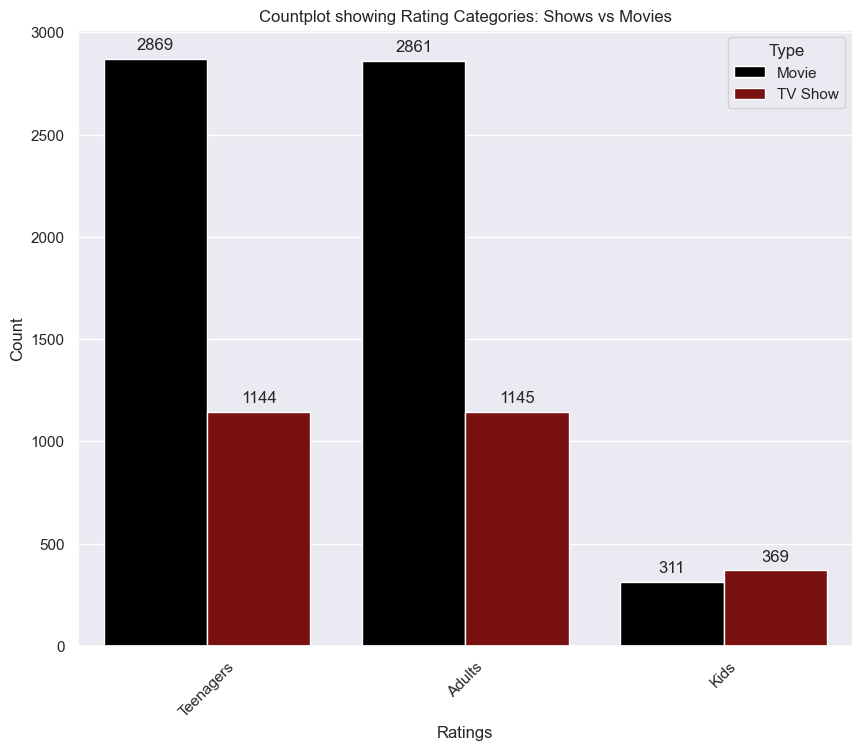

In [11]:
# lists for ratings

kids_criteria = ['TV-Y', 'TV-Y7', 'G']
teenagers_criteria = ['TV-G', 'TV-14', 'PG', 'TV-PG', 'PG-13']
adults_criteria = ['R', 'NC-17', 'TV-MA']

# categorise ratings
def category_rating(rating):
    if rating in kids_criteria:
        return 'Kids'
    elif rating in teenagers_criteria:
        return 'Teenagers'
    elif rating in adults_criteria:
        return 'Adults'

# add new column, group content, sort values    

df['Rating Category'] = df['rating'].apply(category_rating)
rating = df.groupby(['type'])['Rating Category'].value_counts().to_frame()
ratings = rating.groupby('Rating Category')[['count']].agg(['sum', 'max', 'mean'])\
                        .sort_values(('count', 'sum'), ascending=False)

# Countplot showing rating categories

colors = ["black", "darkred"]
custom_palette = sns.color_palette(colors)

plt.figure(figsize=(10, 8))
ax = sns.countplot(x='Rating Category', hue='type', data=df, order=df['Rating Category'].value_counts().index,
                   palette=custom_palette)

# Add count values to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Countplot showing Rating Categories: Shows vs Movies')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()


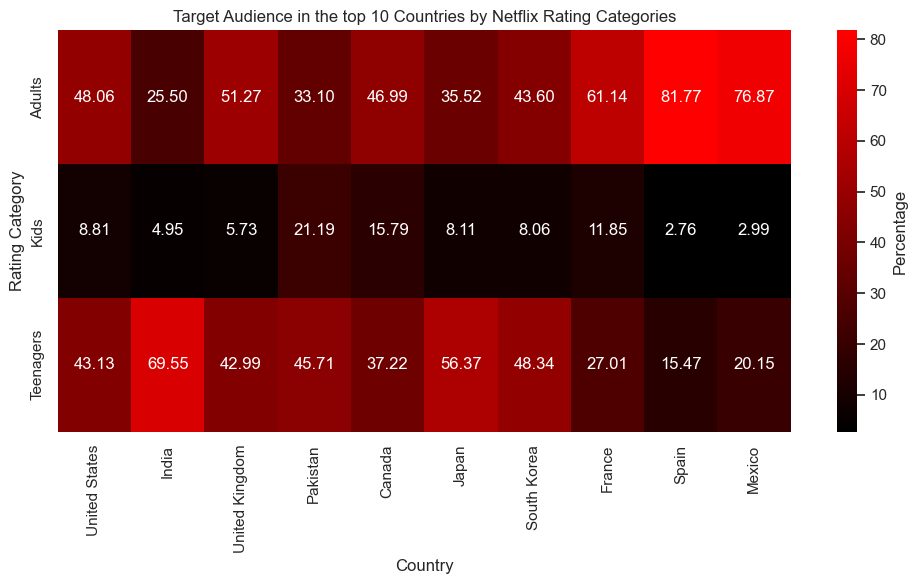

In [12]:
# top 10 countries 

topcountries = df['country'].value_counts().head(11).drop('Unknown')

# groupby country and rating & unstack into columns

country_ratings = df.groupby(['country', 'Rating Category']).size().unstack()

# Calculate percentage
country_ratings_percentage = round(country_ratings.div(country_ratings.sum(axis=1), axis=0) * 100, 2)

# select top 10 countries 
selected_countries = topcountries.index.to_list()

# Filter data on top 10 countries
selected_countries_data = country_ratings_percentage.loc[selected_countries]


# heatmap for categorised ratings by country

colors = [('black'), ('red')]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("Custom Red-Black", colors)

# Transpose the dataframe to switch axes
countries_transposed = selected_countries_data.T

plt.figure(figsize=(10, 6))
sns.heatmap(countries_transposed, cmap=custom_cmap, annot=True, fmt=".2f", cbar_kws={'label': 'Percentage'})
plt.title('Target Audience in the top 10 Countries by Netflix Rating Categories')
plt.xlabel('Country')
plt.ylabel('Rating Category')
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">
<b> <h3 >Rating Trends: Data-driven Insights</h3>
</div> 
<details>
  <summary>Click for Details</summary>
    
**Original Decription of ratings:** https://www.spectrum.net/support/tv/tv-and-movie-ratings-descriptions
    
- Lead ratings for Movies and TV Shows on Netflix are TV-MA (3205 ratings) for adults, and TV-14 (2157 ratings), for teens.
    
- There are more TV ratings compared to movie ratings, suggesting a more fine-tuned approach in categorising TV content.

- While a considerable portion of content from the US and UK is aimed at adult viewers, there is also a substantial selection suited for teenagers.

- Productions from Canada, France, Spain, and Mexico predominantly target adult audiences.
 
- Content from Eastern regions: India, Pakistan, Japan & South Korea, primarily caters towards teenage viewers.
    
**Netflix's catalogue of family-friendly and children's content is significantly smaller. This presents an opportunity for Netflix to invest in 'Original' and 3rd party content aimed at younger audiences, and rival other platforms such as Disney+ and YouTube.**

</details>

# Trends in Content Additions relative to Release Years 

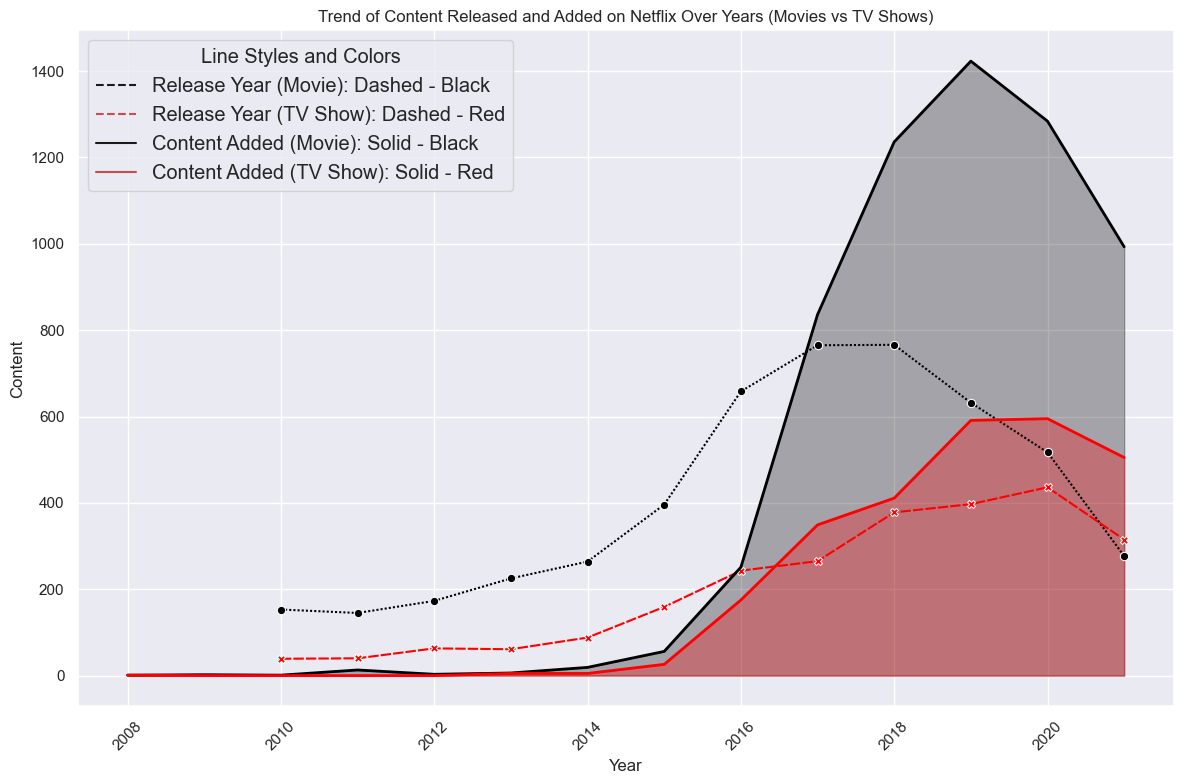

In [13]:
# release year dataframe
df1 = df[['type', 'release_year']].copy()  
df1 = df1.rename(columns={"release_year": "Release Year"})

# count values from 2010
df2 = df1.groupby(['Release Year', 'type']).size().reset_index(name='Total Content')
df2 = df2[df2['Release Year'] >= 2010]

# Data added dataframe
df3 = df[['date_added', 'type']].copy()  
df3['Year'] = pd.to_datetime(df['date_added']).dt.year
df3.loc[:, 'Year'] = pd.to_datetime(df['date_added']).dt.year  # Use .loc to assign values
df4 = df3.groupby(['Year', 'type']).size().reset_index(name='Content Added')

# Plot both on the same plot
plt.figure(figsize=(12, 8))

# dashed lines for release years
sns.lineplot(x="Release Year", y="Total Content", hue='type', data=df2, palette={"Movie": "black", "TV Show": "red"}, 
             style='type', markers=True, dashes={"Movie": (1, 1), "TV Show": (5, 1)}, ax=plt.gca())

# line plot 
sns.lineplot(x="Year", y="Content Added", hue='type', data=df4, palette={"Movie": "black", "TV Show": "red"}, 
             linewidth=2, markersize=8, ax=plt.gca())

# Fill between the line
plt.fill_between(df4[df4['type']=='Movie']['Year'], df4[df4['type']=='Movie']['Content Added'], color="black", alpha=0.3)
plt.fill_between(df4[df4['type']=='TV Show']['Year'], df4[df4['type']=='TV Show']['Content Added'], color="red", alpha=0.3)

plt.title('Trend of Content Released and Added on Netflix Over Years (Movies vs TV Shows)')
plt.xlabel('Year')
plt.ylabel('Content')
plt.xticks(rotation=45)

# Set marker labels
plt.gca().legend(markerscale=2, title='Type', title_fontsize='large', fontsize='large')

# Add legend specifying line styles and colors
legend_labels = {'Release Year (Movie)': 'Dashed - Black', 'Release Year (TV Show)': 'Dashed - Red',
                 'Content Added (Movie)': 'Solid - Black', 'Content Added (TV Show)': 'Solid - Red'}
plt.legend(title='Line Styles and Colors', title_fontsize='large', fontsize='large',
           handles=[plt.Line2D([0], [0], linestyle='--', color='k', label='Dashed - Black'),
                    plt.Line2D([0], [0], linestyle='--', color='r', label='Dashed - Red'),
                    plt.Line2D([0], [0], linestyle='-', color='k', label='Solid - Black'),
                    plt.Line2D([0], [0], linestyle='-', color='r', label='Solid - Red')],
           labels=[f"{label}: {style}" for label, style in legend_labels.items()])

plt.tight_layout()
plt.show()


# Monthly Trends in Content Additions

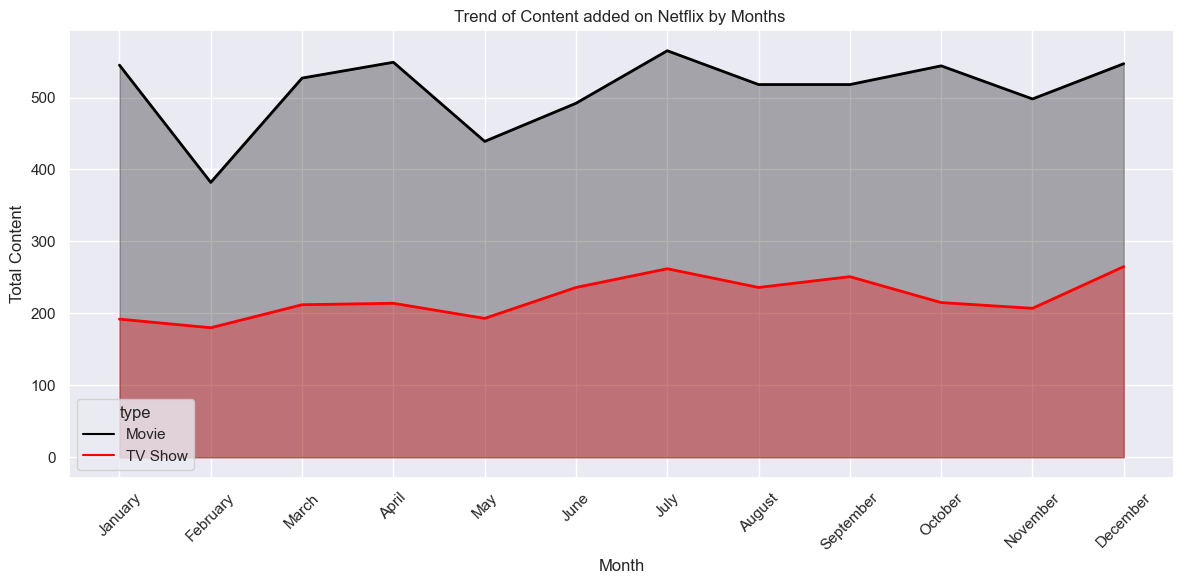

In [14]:
df3 = df3.rename(columns={"date_added": "Date Added"})

# Extract month from the 'Date Added' column and convert to full name of the month
df3['Month'] = pd.to_datetime(df3['Date Added']).dt.strftime('%B')

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert the "Month" column to a categorical data type with the specified order
df3['Month'] = pd.Categorical(df3['Month'], categories=month_order, ordered=True)

# Group by month and type, calculate the total content
df4 = df3.groupby(['Month', 'type']).size().reset_index(name='Total Content')

# Plotting the visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x="Month", y="Total Content", hue='type', data=df4,
             palette={"Movie": "black", "TV Show": "red"},
             linewidth=2, markersize=8)

# Fill between the lines for each type of content
plt.fill_between(df4[df4['type']=='Movie']['Month'], df4[df4['type']=='Movie']['Total Content'], color="black", alpha=0.3)
plt.fill_between(df4[df4['type']=='TV Show']['Month'], df4[df4['type']=='TV Show']['Total Content'], color="red", alpha=0.3)

plt.title('Trend of Content added on Netflix by Months ')
plt.xlabel('Month')
plt.ylabel('Total Content')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">
<b> <h3 >Content Acquisition Trends: Data-driven Insights</h3>
</div> 
<details>
  <summary>Click for Details</summary>
    
- The industry observed a sharp increase in content releases (5612) since 2014 up until the onset of Covid-19 pandemic. 
    
- Peak release for Movies was in 2018 with 766 titles.

- Peak release for TV Shows was in 2020 with 436 titles.
  
- Subsequently, Netflix exploded it's content additions between 2015 and 2020. 2019 observed peak additions of 2014 titles in total. The decline in content additions after 2019 can be attributed to the pandemic and the limitation of the dataset, which concludes in September 2021.

- Content additions occurred predominantly over the past decade, indicating a strong correlation with recent release years and highlighting a significant focus on contemporary content.

- Netflix generally increases its content additions during the latter half of the year, with January, July and December being peak periods for additions with an average of 552 movie additions. This trend reflects an understanding of consumer behavior, particularly their tendency to spend more time streaming during seasonal holiday periods.  
    
- Comparatively, TV Show additions are balanced with an average release of 200 releases per month. The  contrasting nature between TV and Movie industries highlights the demand in production of quality TV episodes, rather than entire seasons. 

- Variation in content additions may be influenced by higher licensing costs immediately after release. 
    
**Netflix often secures rights to popular TV series, allowing the platform to continuously refresh its content library and rotate titles in accordance with licensing agreements. As a result, Netflix ensures both diverse and contemporary content.**
    
</details>


# Trends in Content Duration

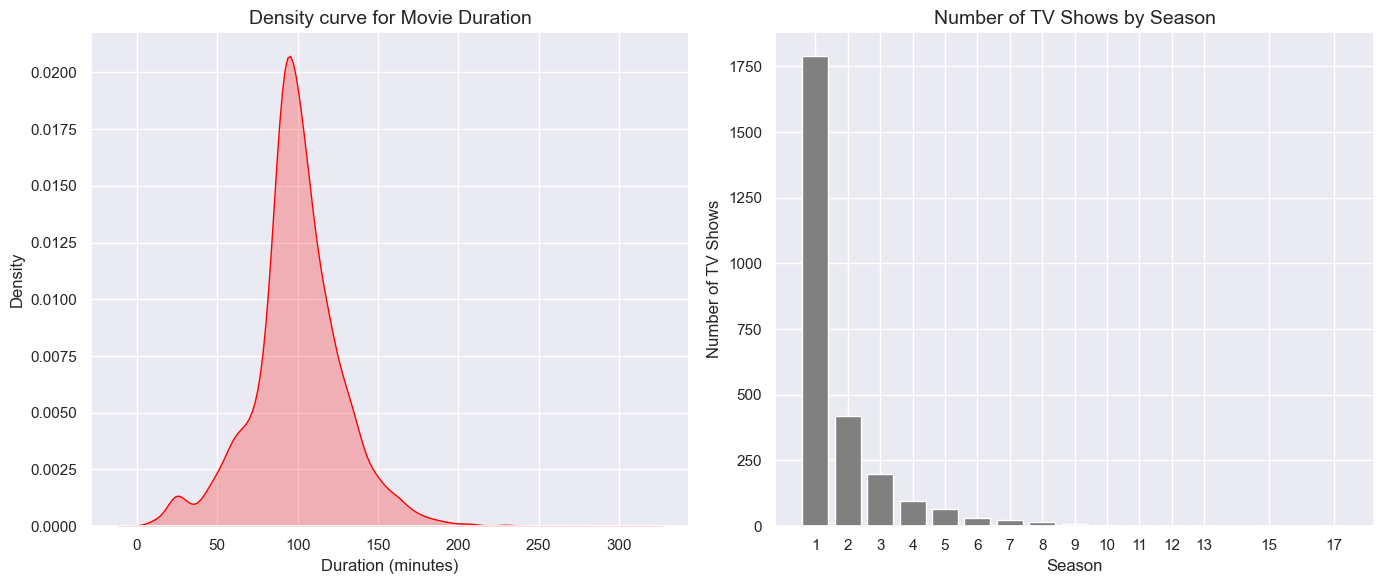

In [15]:
# movie: set column as int
movie_duration = df[df['type'] == 'Movie']['duration'].str.replace('min',
                                                                   '').astype('int64').to_frame()

# Subplot movie 
plt.figure(figsize=(14, 6))  
plt.subplot(1, 2, 1) 
sns.kdeplot(movie_duration['duration'], fill=True, color='red')
plt.title('Density curve for Movie Duration', size=14)
plt.xlabel('Duration (minutes)')
plt.ylabel('Density')

# TV: convert column to int, sort values
tv_duration = df[df['type'] == 'TV Show']['duration'].str.replace(
    r'\bSeasons?\b', '',regex=True).astype('int64').to_frame()
tv_duration_counts = tv_duration['duration'].value_counts().sort_index()

# Subplot TV 
plt.subplot(1, 2, 2)
plt.bar(tv_duration_counts.index, tv_duration_counts.values, color='grey')
plt.title('Number of TV Shows by Season', size=14)
plt.xlabel('Season')
plt.ylabel('Number of TV Shows')
plt.xticks(tv_duration_counts.index)

plt.tight_layout()  
plt.show()


<div class="alert alert-block alert-info">
<b> <h3 >Content Duration: Data-driven Insights</h3>
</div> 
<details>
  <summary>Click for Details</summary>
    
- The average duration of Movies is approximately 75 - 120 minutes, with the most common duration being 99 minutes. This patterns seems to correlate with the average length of Hollywood screen plays.
    
- Netflix predominantly adds single season shows. This may be due to increasing licensing costs for multi-season shows, or unpredictabe success rates for multi-season shows. 
    
**The episode itself is the most important single unit of storytelling on TV, Netflix optimises their approach often staggering episode releases to build enjoyment and retain subscriber engagement.** 
    
</details>

# Summary

The trends uncovered in this dataset feature the following:

**1. Diverse Content Production & Genre base**: Expansion into international markets (86 countries), investment in region-specific content and broad genre based titles suggests that Netflix is well  positioned to cater to a global audience with varied tastes.  

**2. Contemorary Content**: Netflix is actively keeping it's content upto date as the patterns in content additions to the platforn coincide with the surge in content release from 2014 up until the onset of Covid 19 pandemic. The focus on recent content and rotating titles on a monthly basis, ensures fresh and relevant recommendations for viewers, whilst also attracting new subscribers.      

**3. Ratings**: Lead ratings are ‘TV-MA’ and ‘TV-14’ with 3,205 and 2,157 titles respectively. This prevalence suggests that Netflix’s primary target audience is adults and teens. Content strategies targeting these demographics, whilst also, venturing into the kid's content is likely to generate a larger subscriber base.  


# Next Steps

- The peak release year for TV Shows was later than movies which indicates a shift in content popularity. Netflix could consider increasing and diversifying it's TV Show catalogue to attract more subscribers. 

- Netflix could diversify its portfolio by exploring under represented genres and ratings, particularly suited to children and family audiences, potentially attracting a more broad audience.

- Netflix has ammassed content produced from 86 countries. With 195 countries gloabally, Netflix has further opportunity to regionalise their content by exploring a wider geographical content base. 


**Collect further data**:

1. Subscription numbers in different countries, including type of subscriptions, to identify any relationships with content popularity. 

2. User Engagment data: viewer history, duration watched specific to titles, title ratings and titles added to subscribers' watchlist. The aim is to finetune conclusions on content popularity and overall success rate of titles.

3. External Data Sources: Box office performance for titles to identify and compare relaionships accross multiple sources. This data could provide valuable insights into content popularity predictions.   